In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import (auc,
                             confusion_matrix,
                             classification_report, 
                             precision_recall_curve)

In [35]:
df_train = pd.read_csv("C:/Users/reddy/Desktop/training.csv")
df_val = pd.read_csv("C:/Users/reddy/Desktop/validation.csv")

In [36]:
df_train.info()
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1683 non-null   int64  
 1   Year_Birth           1683 non-null   int64  
 2   Education            1683 non-null   object 
 3   Marital_Status       1683 non-null   object 
 4   Income               1663 non-null   float64
 5   Kidhome              1683 non-null   int64  
 6   Teenhome             1683 non-null   int64  
 7   Dt_Customer          1683 non-null   object 
 8   Recency              1683 non-null   int64  
 9   MntWines             1683 non-null   int64  
 10  MntFruits            1683 non-null   int64  
 11  MntMeatProducts      1683 non-null   int64  
 12  MntFishProducts      1683 non-null   int64  
 13  MntSweetProducts     1683 non-null   int64  
 14  MntGoldProds         1683 non-null   int64  
 15  NumDealsPurchases    1683 non-null   i

Accuracy: 0.9048473967684022
Confusion Matrix:
 [[495  14]
 [ 39   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       509
           1       0.39      0.19      0.25        48

    accuracy                           0.90       557
   macro avg       0.66      0.58      0.60       557
weighted avg       0.88      0.90      0.89       557



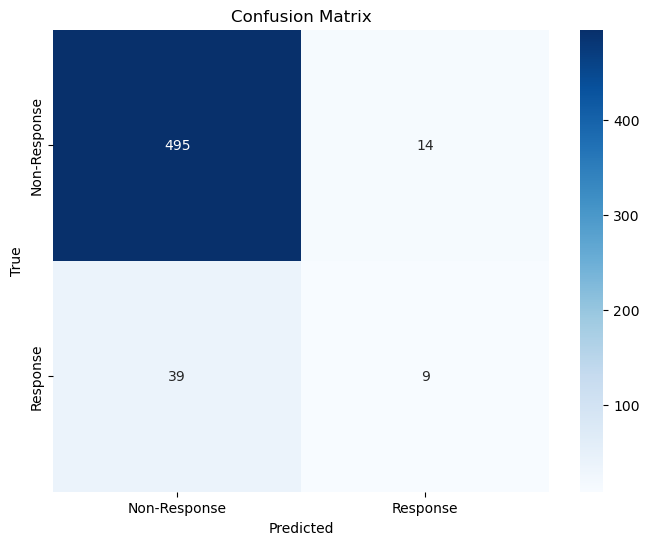

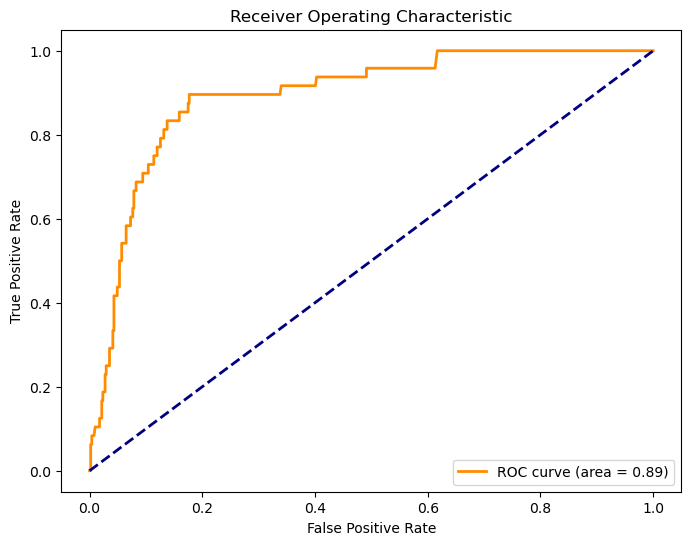

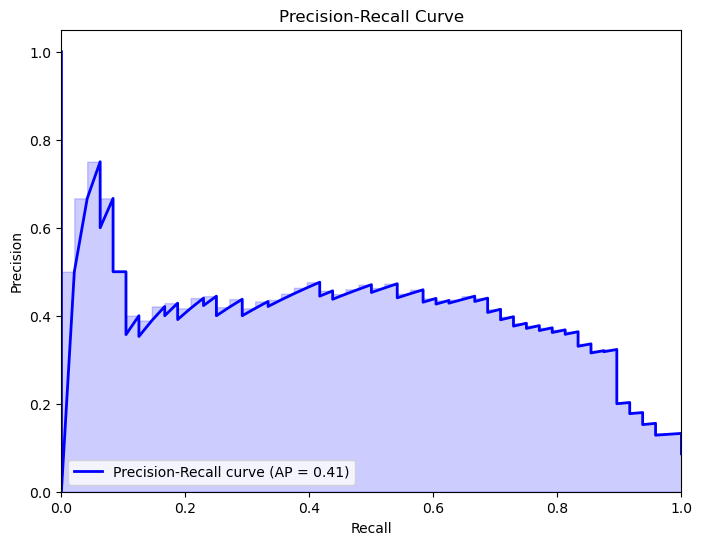

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
import seaborn as sns

# Load the datasets
training_data = pd.read_csv("C:/Users/reddy/Desktop/training.csv")
validation_data = pd.read_csv("C:/Users/reddy/Desktop/validation.csv")

# Handling missing values by imputing with median
median_income = training_data['Income'].median()
training_data['Income'].fillna(median_income, inplace=True)
validation_data['Income'].fillna(median_income, inplace=True)

# Feature selection
features = [
    'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth'
]
target = 'Response'

# Preparing data for training and validation
X_train = training_data[features]
y_train = training_data[target]
X_validation = validation_data[features]
y_validation = validation_data[target]

# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=300)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_validation_scaled)
y_pred_proba = log_reg.predict_proba(X_validation_scaled)[:, 1]

# Evaluation
accuracy = accuracy_score(y_validation, y_pred)
conf_matrix = confusion_matrix(y_validation, y_pred)
report = classification_report(y_validation, y_pred)

# Output results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-Response', 'Response'], yticklabels=['Non-Response', 'Response'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_validation, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_validation, y_pred_proba)
average_precision = average_precision_score(y_validation, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
